---
sidebar_position: 1
---

> You can get this [Notebook](https://github.com/Seeed-Projects/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/blob/main/articles/Chapter_5-Custom_Model_Development_and_Deployment/Training_Your_Model.ipynb) on GitHub.

# Step 1: Prepare you environment on your host computer

**Note：This part of code run on your host computer**

The Jupyter Notebook right up have a button like ![select kernel](../../pictures/Chapter5/select_kernel.png), then you choose ```Select Another Kernel```, and choose ```Python Environments```, then choose ```Creat Python Environment``` and choose ```Venv```, then choose ```python3.10```.

In [1]:
# Here is my hostcomputer information, you should install Ubantu 22.04 if you what use this code.
# Linux PC 6.8.0-45-generic #45~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Sep 11 15:25:05 UTC 2 x86_64 x86_64 x86_64 GNU/Linux.

!uname -a

Linux PC 6.8.0-48-generic #48~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Oct  7 11:24:13 UTC 2 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
# Here is my python version, you should install python3.10.12 
# Python 3.10.12

!python -V

Python 3.10.12


In [4]:
# Install libs, if you see 'install successfully' it means you install libs successfully, or when you see 'install error' it means you install libs unsuccessfully
try:
    %pip install ultralytics opencv-python matplotlib -q
    print('install successfully')
except Exception as e:
    print(f'install error: {e}')


Note: you may need to restart the kernel to use updated packages.
install successfully


# Step 2: Prepare your dateset

I want to build a model to detect different fruit include banana, apple and orange. So I need to collect some pictures of this fruit. And I use [robflow](https://roboflow.com/) to label my dataset.

## Step 1: Create Project

Select ```New Project```:

![roboflow_1](../../pictures/Chapter5/roboflow_1.png)

Fill your project information and create the project

![roboflow_2](../../pictures/Chapter5/roboflow_2.png)

## Step 2: Update images and annotate

Update images

![roboflow_3](../../pictures/Chapter5/roboflow_3.png)

Label your image

![roboflow_4](../../pictures/Chapter5/roboflow_4.png)

## Step 3: Export dataset

Add annotated image to your dataset

![roboflow_5](../../pictures/Chapter5/roboflow_5.png)

Generate New version of your dataset

![roboflow_6](../../pictures/Chapter5/roboflow_6.png)

Download your dataset

![roboflow_7](../../pictures/Chapter5/roboflow_7.png)


In [4]:
# Download gdown to install dataset from google driver, if you see 'install successfully' it means you install libs successfully, or when you see 'install error' it means you install libs unsuccessfully
try:
    %pip install gdown -q
    print('install successfully')
except Exception as e:
    print(f'install error: {e}')

Note: you may need to restart the kernel to use updated packages.
install successfully


In [5]:
# Download your dataset, and you can also train your model on roboflow 
try:  
    !gdown https://drive.google.com/uc?id=1zZKnIVAcdNLUKg7IxaF-xLzE3Fvr3A05  && unzip roboflow.zip -d ~/datasets/ && rm roboflow.zip && mv ~/datasets/data.yaml ./data.yaml && cp -r ~/datasets/test/images ./
    print('install successfully')
except Exception as e:
    print(f'install error: {e}')

Downloading...
From: https://drive.google.com/uc?id=1zZKnIVAcdNLUKg7IxaF-xLzE3Fvr3A05
To: /home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/articles/Chapter 5 - Custom Model Development and Deployment/roboflow.zip
100%|██████████████████████████████████████| 6.71M/6.71M [00:00<00:00, 7.89MB/s]
Archive:  roboflow.zip
  inflating: /home/jiahao/datasets/README.dataset.txt  
  inflating: /home/jiahao/datasets/README.roboflow.txt  
  inflating: /home/jiahao/datasets/data.yaml  
   creating: /home/jiahao/datasets/test/
   creating: /home/jiahao/datasets/test/images/
 extracting: /home/jiahao/datasets/test/images/20240918104508517_jpg.rf.fc23cc5073658776229f2ce2facaccf2.jpg  
 extracting: /home/jiahao/datasets/test/images/20240918104609422_jpg.rf.1b1eec4e7487857e73728fb66b5c19e5.jpg  
 extracting: /home/jiahao/datasets/test/images/20240918111003194_jpg.rf.0d8caffdb9f7ed581ae4790861117445.jpg  
 extracting: /home/jiahao/datasets/test/images/20240918111025904_jpg.rf.ecc1f6af3e

# Step 3: Training Yolov8n

YOLOv8 is one of the most famous version in the YOLO (You Only Look Once) series developed by [Ultralytics](https://docs.ultralytics.com/). It retains the key features of earlier versions, focusing on real-time object detection with improvements in speed, accuracy, and versatility across various tasks, such as object detection, segmentation, classification, and pose estimation.

In [5]:
! pip install ultralytics
! yolo settings

JSONDict("/home/jiahao/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/home/jiahao/datasets/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "40489ac8acd593345ab18902ca3b144afe5e4e24581e2753145603914651bb47",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": true,
  "wandb": false,
  "vscode_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [6]:
! yolo detect train data=data.yaml model=yolov8n.yaml epochs=100 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.1+cu124 CPU (AMD Ryzen 5 5600G with Radeon Graphics)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo


0: 640x640 1 apple, 1 banana, 1 orange, 44.2ms
Speed: 1.5ms preprocess, 44.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


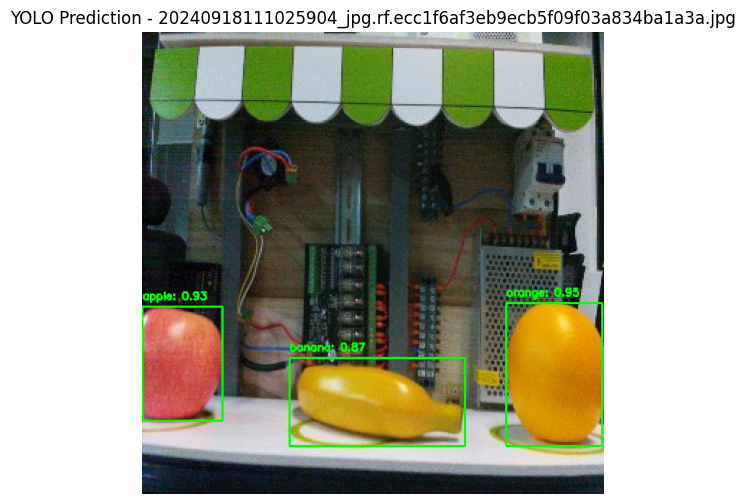


0: 640x640 1 apple, 1 banana, 1 orange, 42.9ms
Speed: 1.3ms preprocess, 42.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


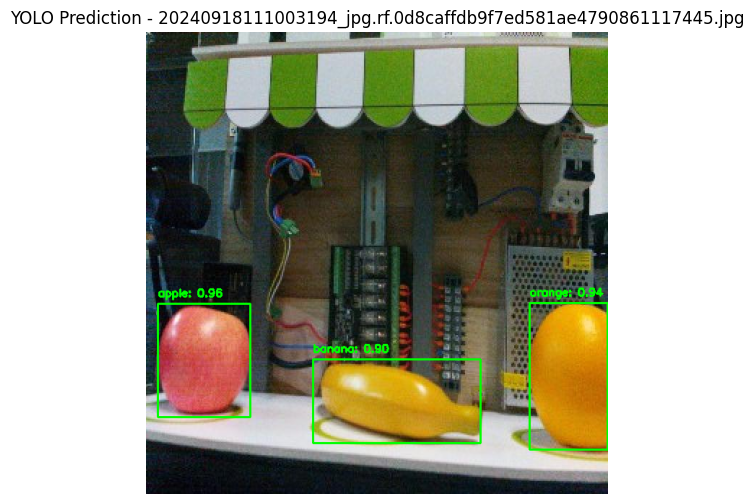


0: 640x640 2 bananas, 1 orange, 43.2ms
Speed: 1.0ms preprocess, 43.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


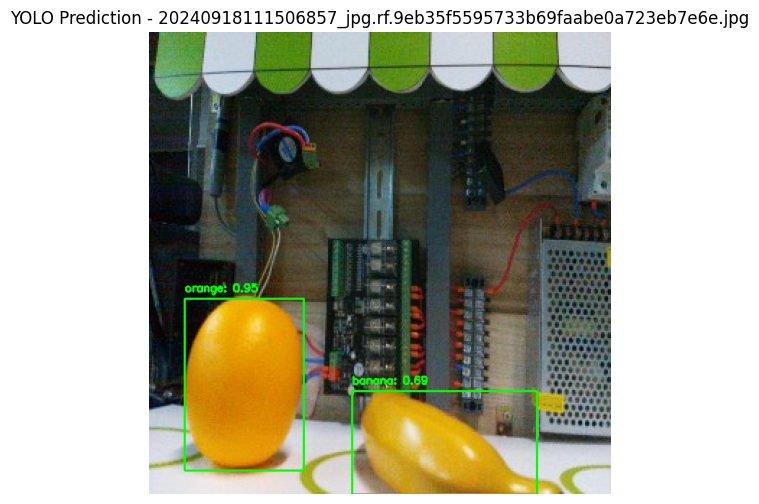


0: 640x640 1 apple, 1 orange, 43.4ms
Speed: 1.3ms preprocess, 43.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


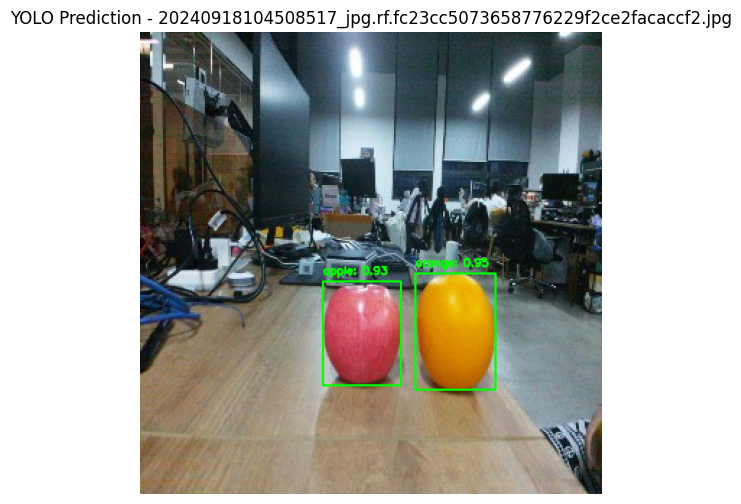


0: 640x640 1 apple, 2 bananas, 1 orange, 61.5ms
Speed: 1.3ms preprocess, 61.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


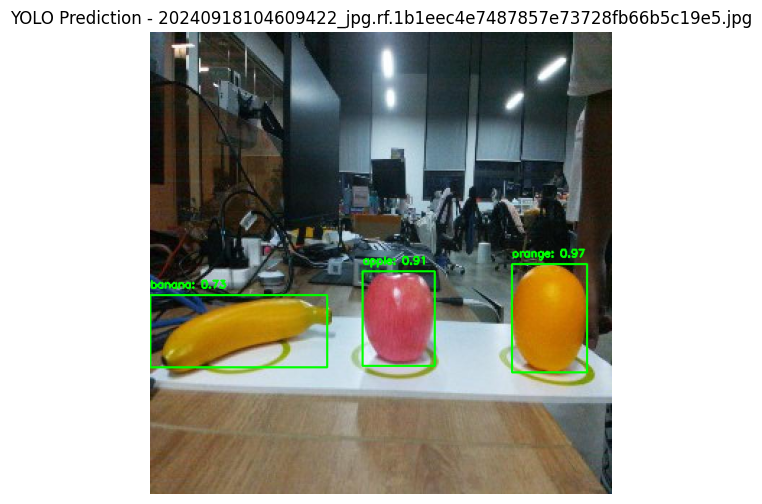


0: 640x640 1 apple, 51.1ms
Speed: 1.0ms preprocess, 51.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


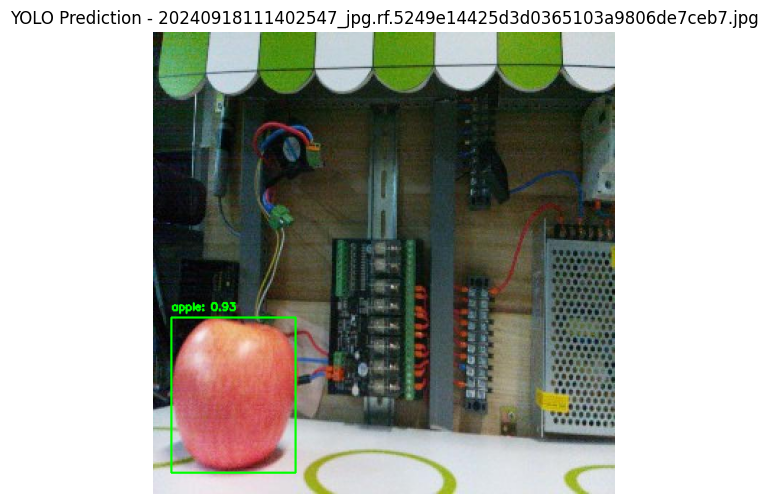


0: 640x640 1 apple, 1 banana, 1 orange, 46.6ms
Speed: 1.3ms preprocess, 46.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


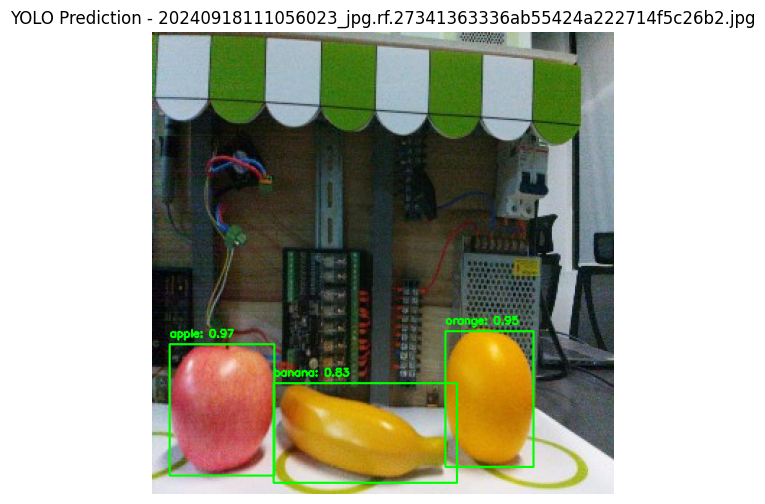


0: 640x640 1 apple, 1 orange, 47.3ms
Speed: 1.1ms preprocess, 47.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


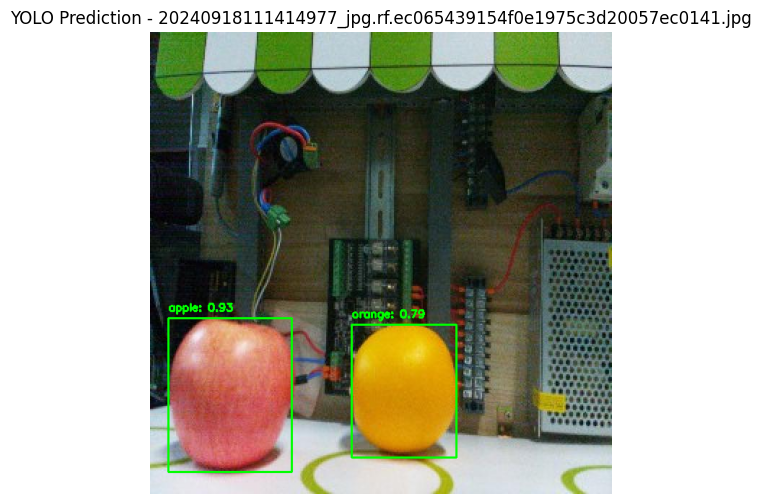


0: 640x640 1 apple, 2 bananas, 37.2ms
Speed: 1.1ms preprocess, 37.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


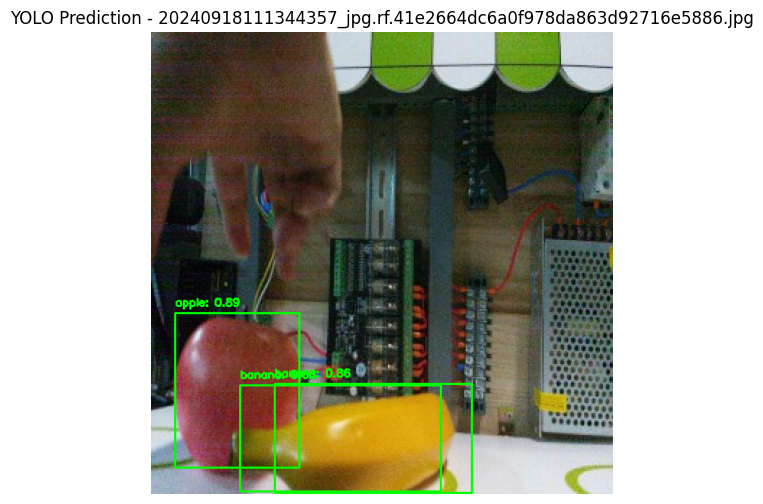


0: 640x640 1 apple, 1 banana, 1 orange, 47.5ms
Speed: 0.9ms preprocess, 47.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


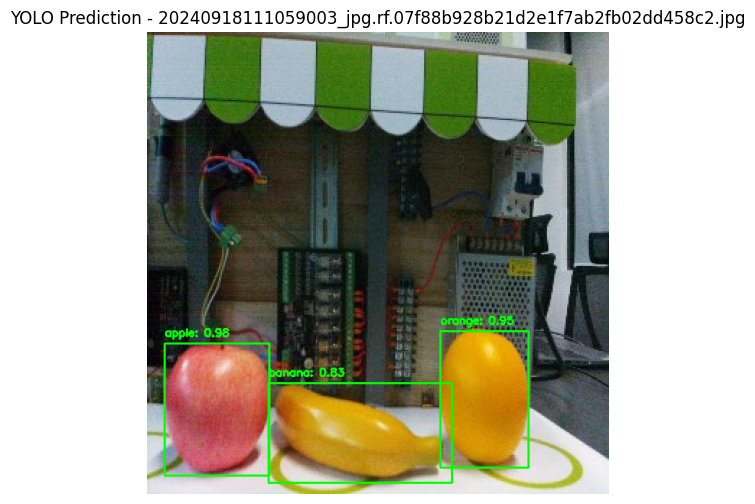


0: 640x640 1 apple, 1 banana, 1 orange, 41.2ms
Speed: 1.2ms preprocess, 41.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


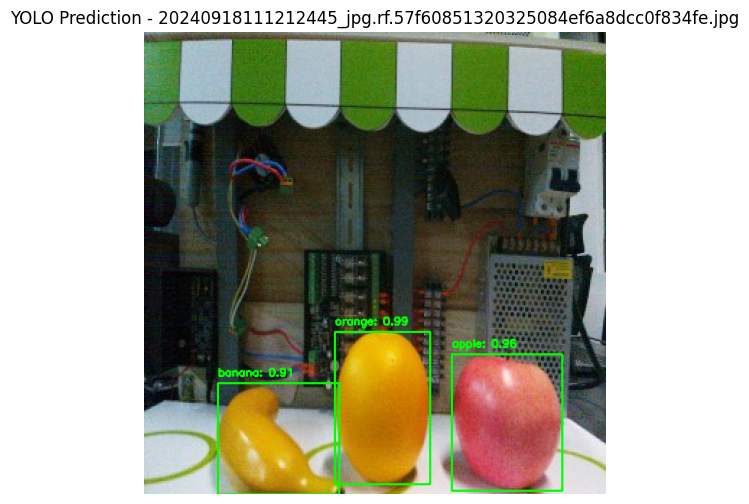

In [15]:
%matplotlib inline

import cv2
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO


# Define the image directory path
image_dir = './images/'

# Load the best model
model = YOLO('./runs/detect/train/weights/best.pt')

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Loop through each image in the directory
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)

    # Perform prediction
    results = model(image)

    # Process the results and draw bounding boxes
    for result in results:
        # Extract bounding boxes
        boxes = result.boxes
        if boxes is not None:
            for box in boxes:
                conf = box.conf[0]  # Confidence score
                if conf > 0.5:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
                    cls = int(box.cls[0])  # Class label index
                    label = f"{model.names[cls]}: {conf:.2f}"  # Create label text

                    # Draw the bounding box and label on the image
                    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
                    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Green label

    # Convert BGR image (from OpenCV) to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the result image using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis
    plt.title(f"YOLO Prediction - {image_file}")
    plt.show()


# Step 4: Export to ONNX format

I will use Hailo DataFlow Compiler to convert model to hef format to inference on AI Kit, so I need to convert model to onnx format.

In [16]:
# Export Yolov11n model to onnx format, the path will be shown as below
# For me the path is /home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/runs/detect/train/weights/best.onnx
model = YOLO('./runs/detect/train/weights/best.pt')
model.export(format="onnx", opset=9)

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.1+cu124 CPU (AMD Ryzen 5 5600G with Radeon Graphics)
YOLOv8n summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 10.7 MB/s eta 0:00:00a 0:00:01

requirements: AutoUpdate success ✅ 4.4s, installed 2 packages: ['onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 9...
ONNX: slimming with onnxslim 0.1.39...
ONNX: export success ✅ 5.0s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (5.2s)
Results saved to /home/jiahao/Tutorial-of-AI-Kit-with-Raspberry-Pi-From-Zero-to-Hero/articles/Chapter 5 - Custom Mod

'runs/detect/train/weights/best.onnx'